The Android App Market on Google Play Project:

In this project I will be doing a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories and look for insights in the data to devise strategies to drive growth and retention. 

The data consist of two files,
apps.csv - contains all the details of the applications on Google Play. There are 13 features that describe a given app.
user_reviews.csv - contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

I am going to start by importing the data, droping duplicate rows and inspecting the data.

In [43]:
#Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

#Droping duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

#Printing the total number of apps
print('Total number of apps in the dataset = ', len(apps))

#Looking at a random sample of 5 rows
print(apps.sample(5))

Total number of apps in the dataset =  9659
      Unnamed: 0                             App          Category  Rating  \
1434        1773   Extreme Car Driving Simulator              GAME     4.3   
4910        5897    Explore Sedona & Northern AZ  TRAVEL_AND_LOCAL     3.8   
3782        4701     The grand theft V Wallpaper   PERSONALIZATION     3.8   
7860        8979                       DW Mobile          BUSINESS     2.7   
4025        4968  Best Applock - Locker & No Ads      PRODUCTIVITY     4.7   

      Reviews  Size      Installs  Type Price Content Rating           Genres  \
1434  2251012  52.0  100,000,000+  Free     0       Everyone           Racing   
4910       43  22.0       10,000+  Free     0       Everyone   Travel & Local   
3782       87   4.3       10,000+  Free     0   Everyone 10+  Personalization   
7860       33   NaN       10,000+  Free     0       Everyone         Business   
4025    10672   6.9      100,000+  Free     0       Everyone     Productivity   



Next I will clean the data by removing some unnecessary characters from columns where there shouldn't be special characters.

In [45]:
#List of characters to remove
chars_to_remove = ['+',',','$']
#List of column names to clean
cols_to_clean = ['Installs', 'Price']

#Loop for each column in cols_to_clean
for col in cols_to_clean:
    #Loop for each char in chars_to_remove
    for char in chars_to_remove:
        #Replacing the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
#Summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
Unnamed: 0        9659 non-null int64
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null float64
Installs          9659 non-null object
Type              9659 non-null object
Price             9659 non-null object
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


Now that the special characters haven been removed I will change Installs and Price to float to make them easier to work with.

In [47]:
import numpy as np

#Converting Installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

#Converting Price to float data type
apps['Price'] = apps['Price'].astype(float)

#Checking dtypes of the apps dataframe
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


I'm going to dig deeper on the different categories the apps are placed in. I want to know how many categories there are, which category has the highest share of apps in the market, and which categories have the fewest number of apps.

In [49]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Printing the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

#Counting the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

#Sorting num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)
data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


Apps rating are a major kpi so I will look into the Rating column by finding the average app rating and plot the distribution of apps according to their ratings.

In [51]:
#Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

#Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

#Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


The average rating for apps across all categories is 4.17 out of 5 stars. The histogram is skewed to the left so this tells me the majority of apps are rated highly with only a few exceptions with low ratings.

Next I will be looking at app size and price. I want to know if the size of the app affects the rating, do users really care about larger download sizes or if they prefer smaller download sizes, does the price of an app affect it's rating, and do users always prefer free apps over paid apps.

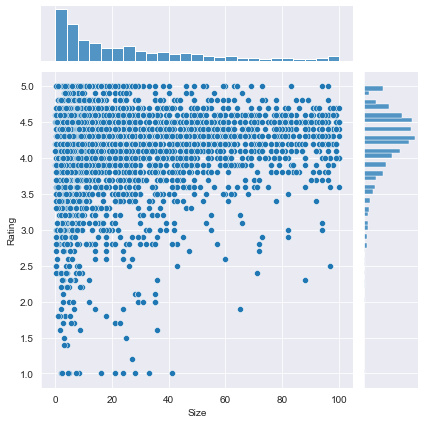

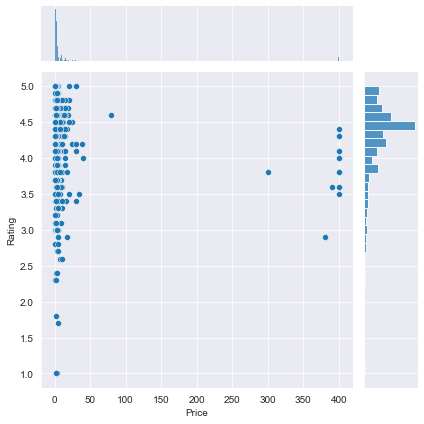

In [53]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

#Selecting rows where both 'Rating' and 'Size' values are present
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

#Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

#Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

#Selecting apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

#Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

I found that the majority of the top rated apps range from 2 MB to 20 MB and also found that the vast majority of apps price themselves under $10'

Pricing of an app is very important sense so many of them are free so I want to know which apps are priced the highest. 

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


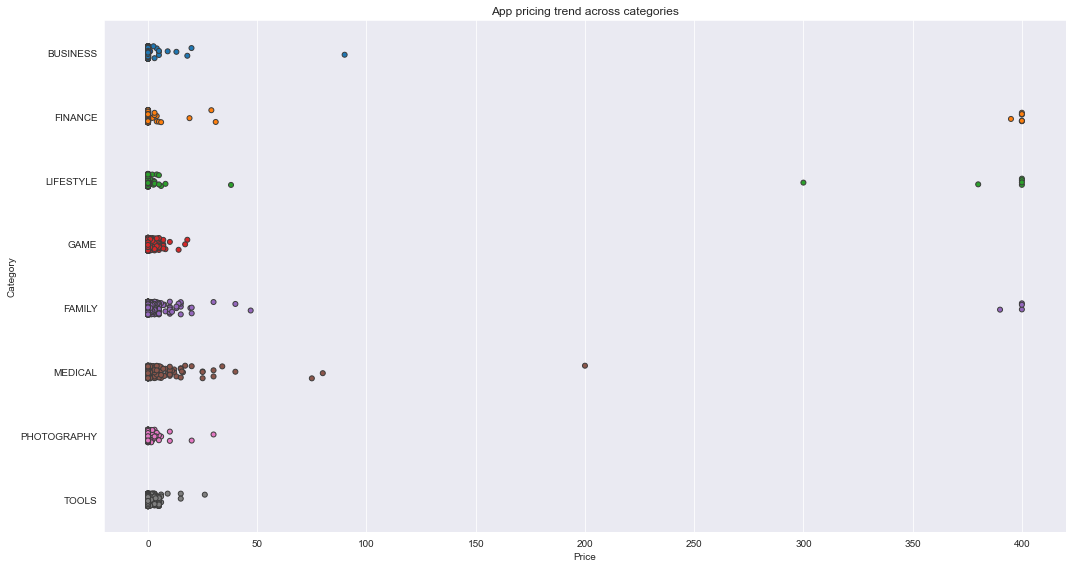

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

#Selecting a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

#Examining the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

#Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

There seems to be a lot of "junk" apps charging very high prices so I will filter these out and re-do the visualization.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

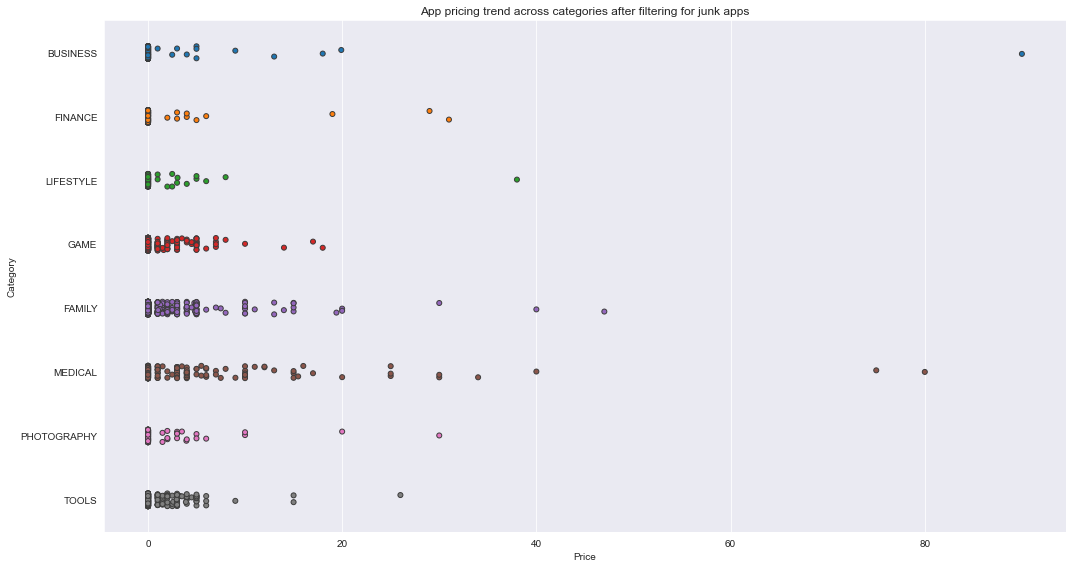

In [57]:
#Selecting apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

#Examining price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

Medical and Family apps have the most expensive apps with a Medical app even reaching $80 while all Game apps are priced under $20.

The majority of apps can be installed for free so I want to confirm that free apps are downloaded at a higher frequency than paid apps.

In [59]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

As predicted paid apps have a relatively lower number of installs than free apps but the difference wasn't as wide as I expected.

There is an interesting column called Sentiment that has looked for positive or negative words in user reviews to get a idea of the overall tone of the review. I want to see the sentiment polarity for paid vs free apps. 

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

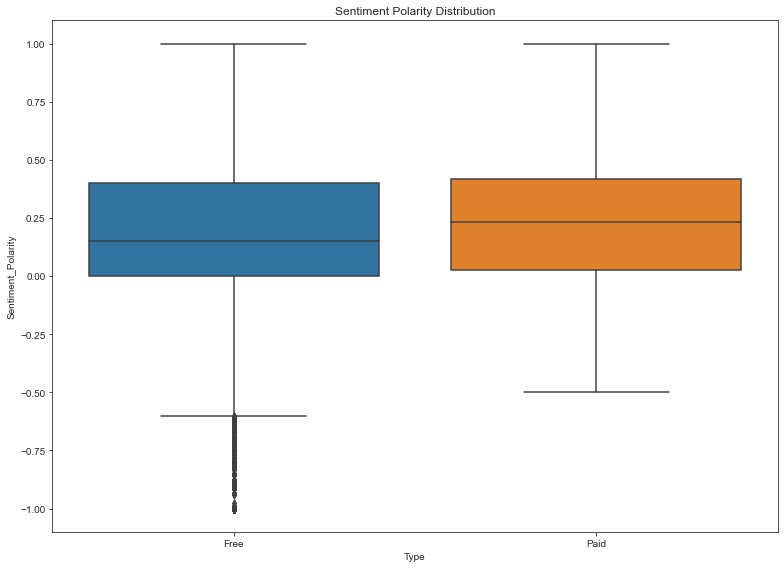

In [61]:
#Loading user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

#Joining the two dataframes
merged_df = pd.merge(apps, reviews_df, on = "App")

#Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

#User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

By plotting sentiment polarity scores of user reviews for paid and free apps I can see that free apps receive a lot harsh comments, as indicated by the outliers on the negaative y-axis while reviews for paid apps appear to never have very negative reviews. This may indicate that quality of paid apps is higher than free apps. 

Conclusion: 
I analyzed over ten thousand apps from the Google Play Store and these findings could be used to inform decisions on creating an app. Family and Game apps have the highest market prevalence so you have a large audience if you make an app that fits in this category. Most apps review pretty highly with the average being 4.17 and the apps with the best rating have a download size between 2 MB and 20 MB. Ratings are a major kpi and impact the discoverability, conversion of apps as well the company's overall brand image so making sure your app falls within in the range can increase the success of the app. Also most apps price themselves under $10 so staying under that amount is important as well. The most expensive apps fall within the Medical and Family apps so if your app is in one of those categories you could justify going above the $10 threshold. Lastly paid apps overall get better reviews than free apps but free apps are downloaded more this is also an important consideration when thinking about the price of your app. 

Thank you for reading!